In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df =pd.read_csv("https://raw.githubusercontent.com/Deepanshu276/Hamoye-Projects/main/stage%20c/Data_for_UCI_named.csv")

In [3]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [5]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


<AxesSubplot:>

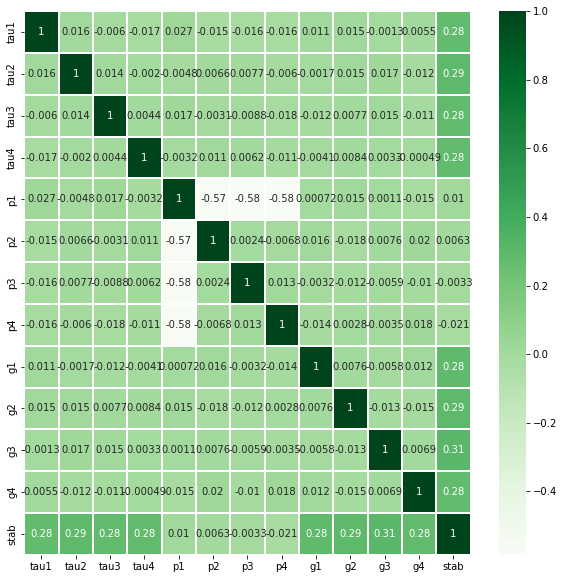

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':10},cmap=plt.cm.Greens, linewidth=0.2)

Columns p1,p2,p3,p4 have multicolimnearity with one another. Thus droping them.

df= df.drop(['p1','p2','p3','p4'], axis = 1)

In [7]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score

In [9]:
X=df.drop(['stab','stabf'], axis=1)

In [10]:
y=df['stabf']

In [11]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model=DecisionTreeClassifier()

In [13]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
base_pred=model.predict(X_test)

In [15]:
confusion_matrix(y_test, base_pred)

array([[ 550,  143],
       [ 162, 1145]], dtype=int64)

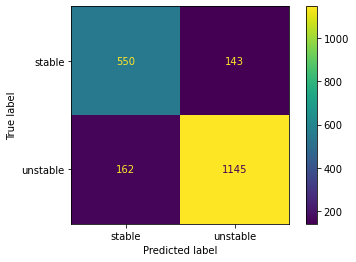

In [16]:
plot_confusion_matrix(model, X_test, y_test)

In [17]:
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

      stable       0.77      0.79      0.78       693
    unstable       0.89      0.88      0.88      1307

    accuracy                           0.85      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.85      0.85      0.85      2000



In [18]:
p=model.feature_importances_

In [19]:
pd.DataFrame(data=p, index= X.columns,columns=['Feature Inportance']).sort_values('Feature Inportance')

,Feature Inportance
p2,0.011797
p3,0.013595
p1,0.019901
p4,0.020600
g1,0.106302
g2,0.106969
g4,0.112092
tau3,0.113943
g3,0.118311
tau1,0.118732


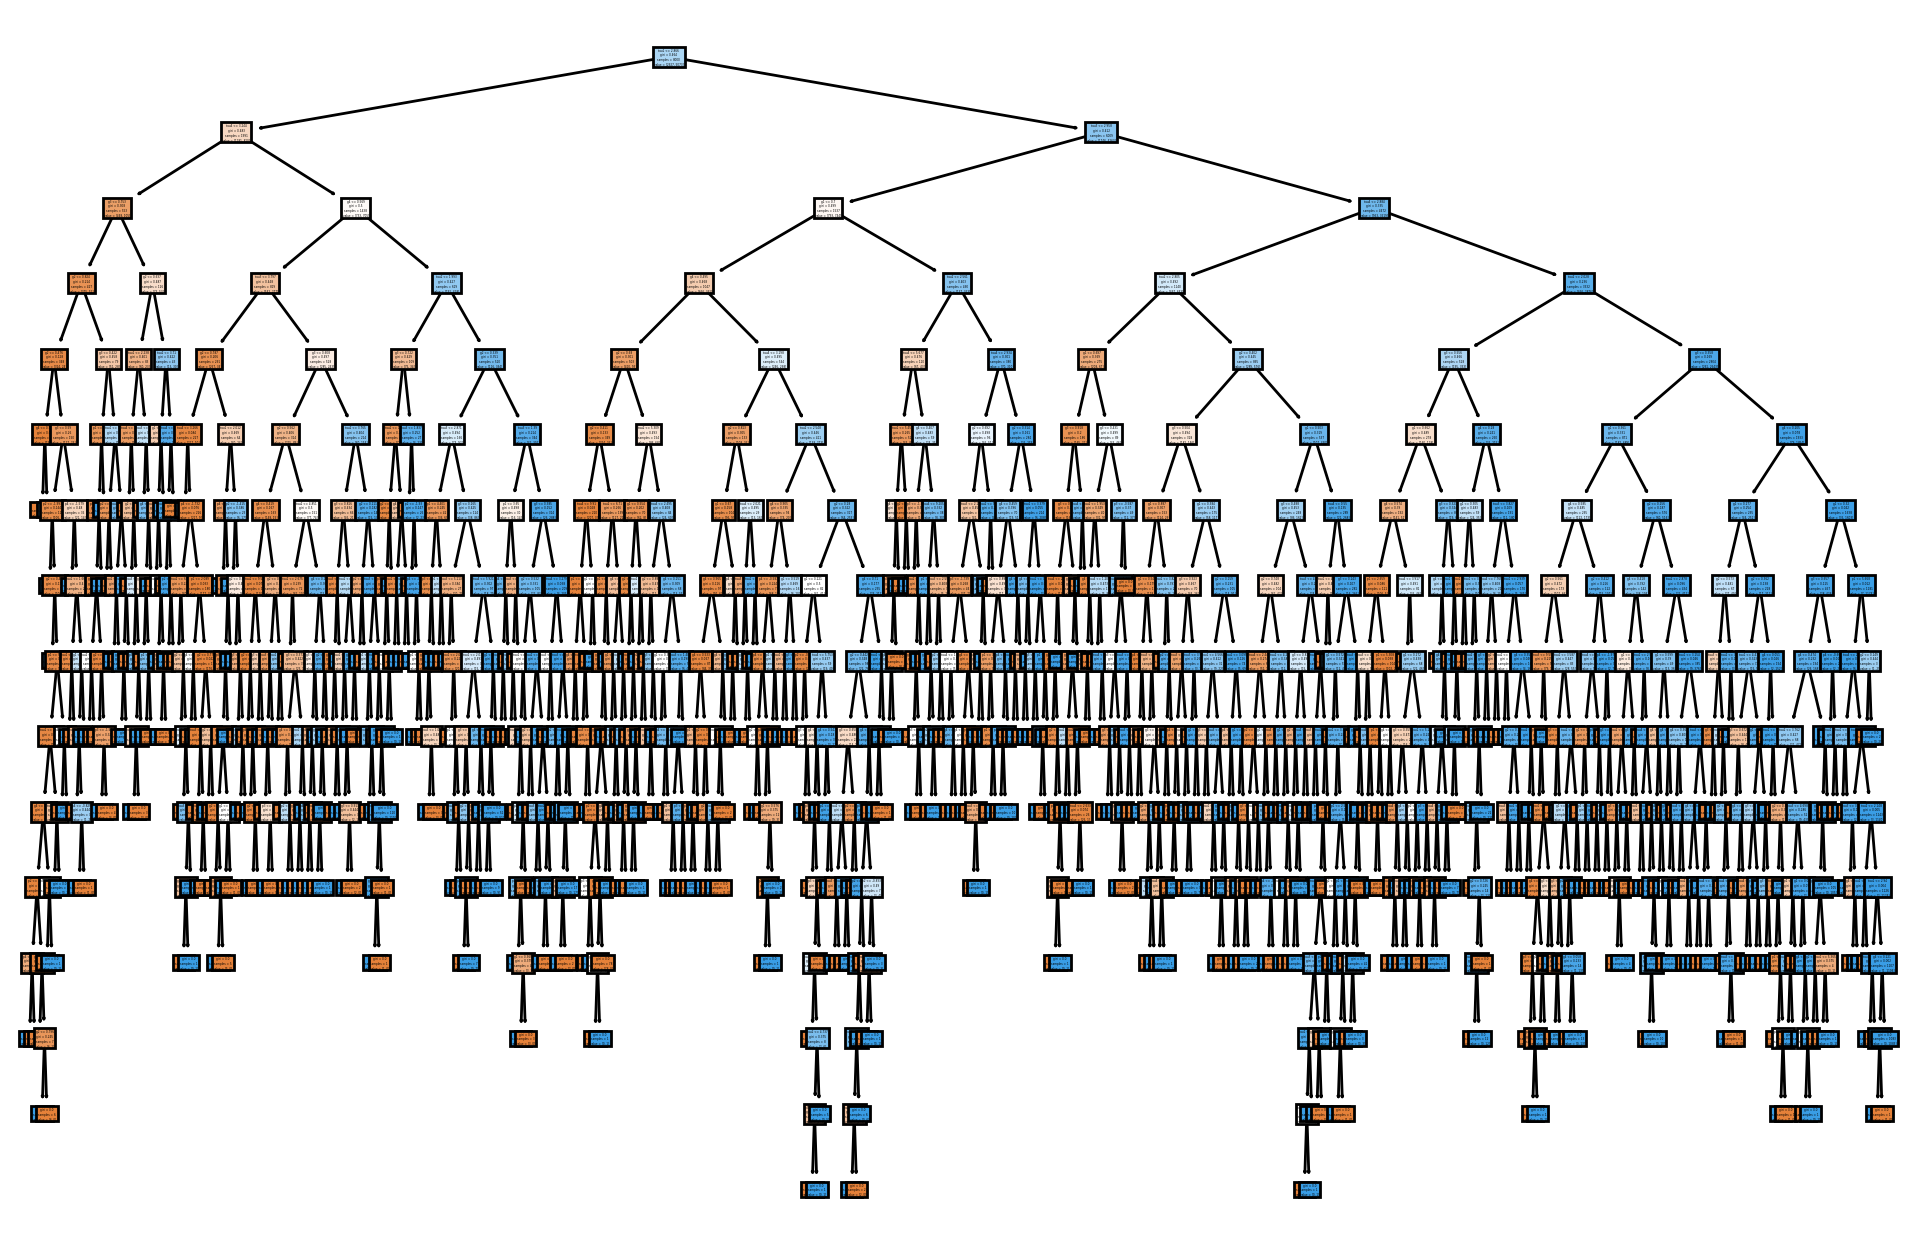

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize =(12,8), dpi=200)
plot_tree(model, filled= True, feature_names=X.columns);

In [21]:
from sklearn.model_selection import GridSearchCV

In [42]:
params={'max_depth': [3,4,5,6],
        "criterion" : ["gini", "entropy"]}

In [43]:
grid_model = GridSearchCV(estimator =model, param_grid=params, cv =5)

In [44]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6]})

In [45]:
grid_model.best_params_


{'criterion': 'entropy', 'max_depth': 6}

In [46]:
grid_model.best_score_

0.8300000000000001

In [67]:
model= DecisionTreeClassifier( max_depth=4, criterion="entropy", max_features= None,max_leaf_nodes= None)
model.fit(X_train, y_train)

Grid_model_predict= Grid_Model.predict(X_test)

accuracy_score(y_test, Grid_model_predict)

0.7595

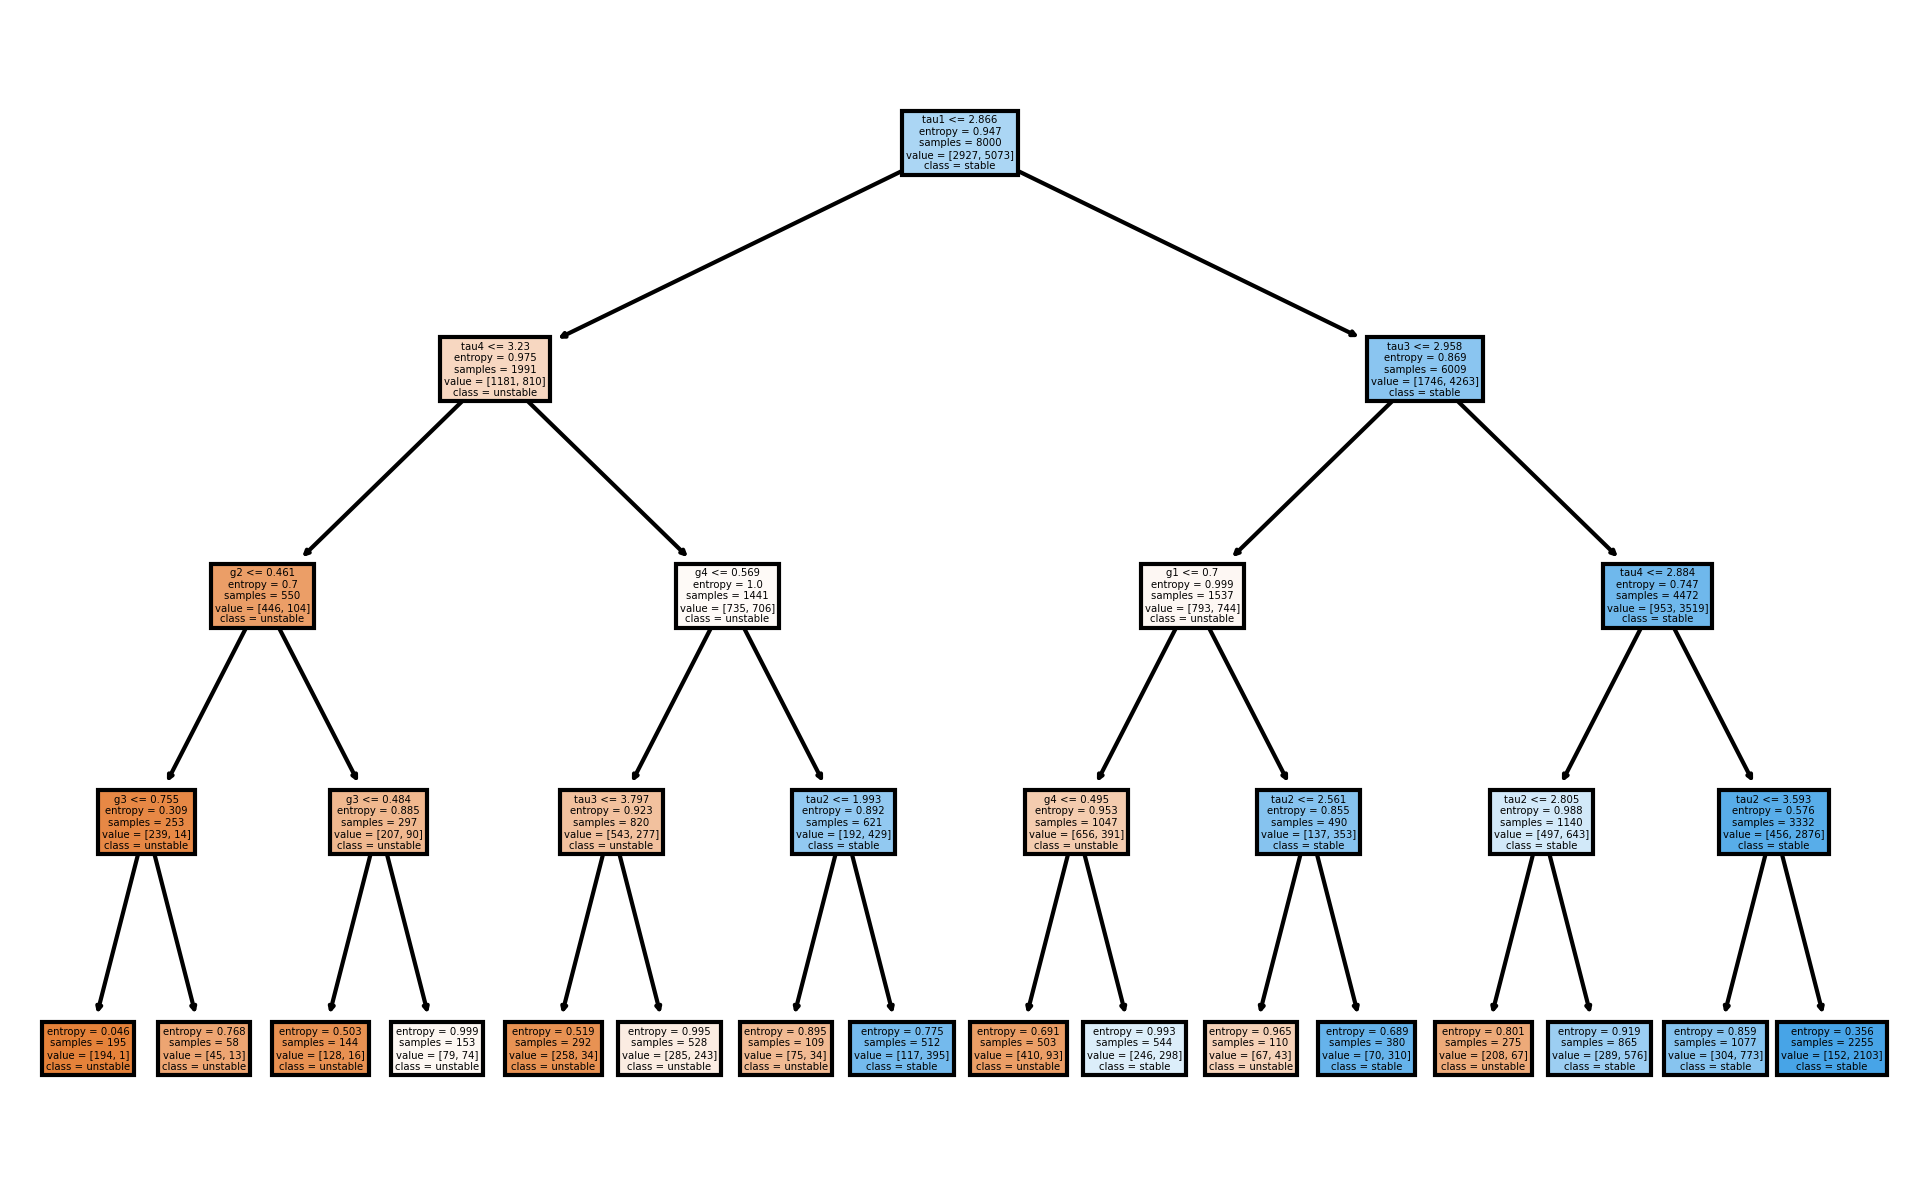

In [69]:
plt.figure( figsize=(8,5),dpi=300)
plot_tree(Grid_Model, feature_names= X.columns, filled=True, class_names=y);

In [64]:
def report_model(model):
    model_pred=model.predict(X_test)
    print(classification_report(y_test, model_pred))
    print(confusion_matrix(y_test, model_pred))
    print()
    print("Accuracy score: ", accuracy_score(y_test, model_pred))
    print()
    plot_confusion_matrix(model, X_test, y_test)
    print()
    plt.figure( figsize=(8,5),dpi=400)
    plot_tree(Grid_Model, feature_names= X.columns, filled=True, class_names=y);

              precision    recall  f1-score   support

      stable       0.69      0.57      0.62       693
    unstable       0.79      0.87      0.83      1307

    accuracy                           0.76      2000
   macro avg       0.74      0.72      0.72      2000
weighted avg       0.76      0.76      0.76      2000

[[ 392  301]
 [ 175 1132]]

Accuracy score:  0.762




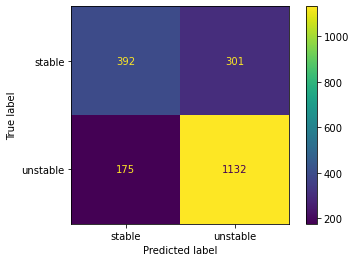

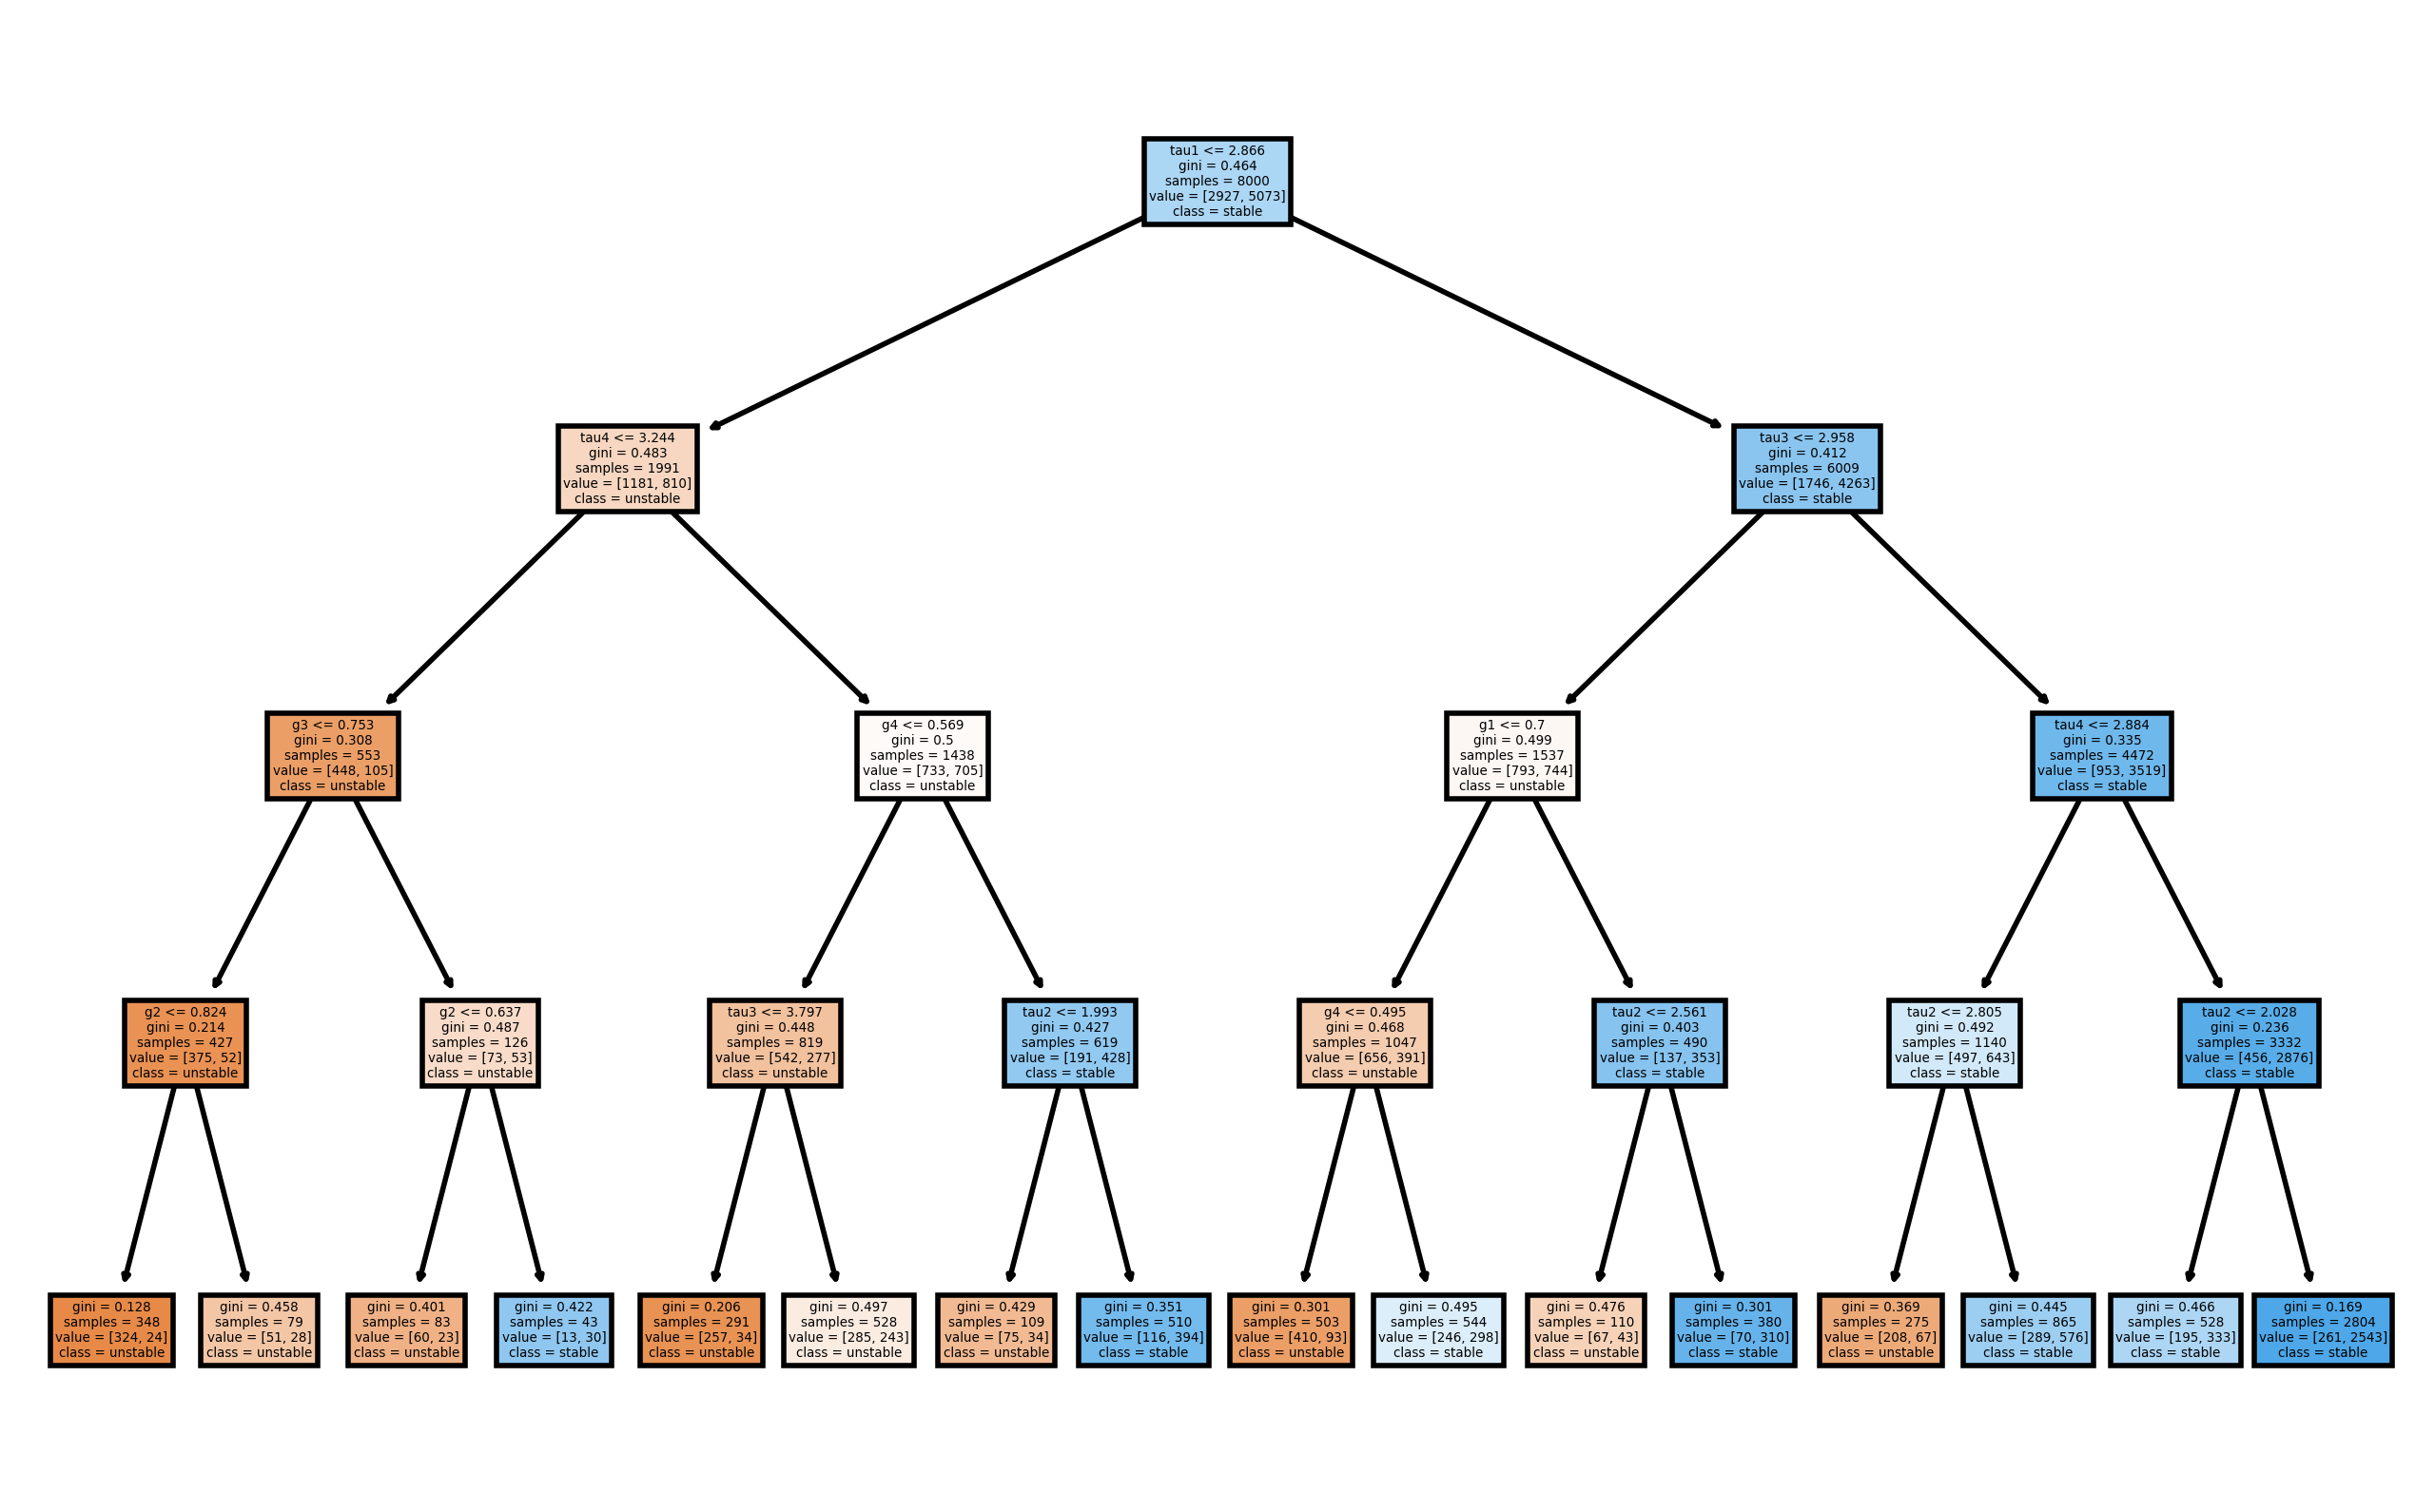

In [65]:
report_model(Grid_Model)